In [7]:
import math
import numpy as np
import pandas as pd
import tensorflow as tf
import pandas_datareader as pdr
import matplotlib.pyplot as plt

In [8]:
url = "https://raw.githubusercontent.com/mwitiderrick/stockprice/master/NSE-TATAGLOBAL.csv"
data = pd.read_csv(url)

In [9]:
data = data.sort_values(by=['Date'])
data.head()

,Date,Open,High,Low,Last,Close,Total Trade Quantity,Turnover (Lacs)
2034,2010-07-21,122.1,123.00,121.05,121.10,121.55,658666,803.56
2033,2010-07-22,120.3,122.00,120.25,120.75,120.90,293312,355.17
2032,2010-07-23,121.8,121.95,120.25,120.35,120.65,281312,340.31
2031,2010-07-26,120.1,121.00,117.10,117.10,117.60,658440,780.01
2030,2010-07-27,117.6,119.50,112.00,118.80,118.65,586100,694.98


In [10]:
data.describe()

,Open,High,Low,Last,Close,Total Trade Quantity,Turnover (Lacs)
count,2035.000000,2035.000000,2035.000000,2035.000000,2035.00000,2.035000e+03,2035.000000
mean,149.713735,151.992826,147.293931,149.474251,149.45027,2.335681e+06,3899.980565
std,48.664509,49.413109,47.931958,48.732570,48.71204,2.091778e+06,4570.767877
min,81.100000,82.800000,80.000000,81.000000,80.95000,3.961000e+04,37.040000
25%,120.025000,122.100000,118.300000,120.075000,120.05000,1.146444e+06,1427.460000
50%,141.500000,143.400000,139.600000,141.100000,141.25000,1.783456e+06,2512.030000
75%,157.175000,159.400000,155.150000,156.925000,156.90000,2.813594e+06,4539.015000
max,327.700000,328.750000,321.650000,325.950000,325.75000,2.919102e+07,55755.080000


In [11]:
df = data.reset_index()['Close']
df.shape

(2035,)

In [12]:
df.head()

0    121.55
1    120.90
2    120.65
3    117.60
4    118.65
Name: Close, dtype: float64

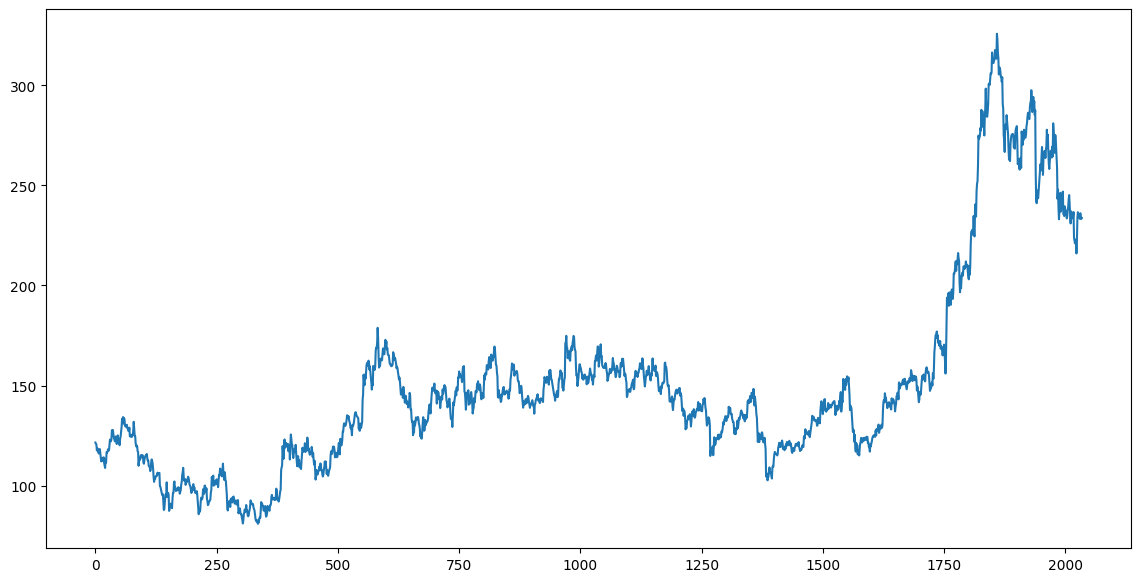

In [13]:
plt.figure(figsize=(14, 7))
plt.plot(df)
plt.show()

In [14]:
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler(feature_range = (0, 1))
df = sc.fit_transform(np.array(df).reshape(-1,1))
df.shape

(2035, 1)

In [15]:
train_size = int(len(df) * 0.80)
test_size = len(df) - train_size
train_size, test_size
train_data, test_data = df[0:train_size, :], df[train_size:len(df), :1]

In [16]:
def make_dataset(data, time_step):
	d1, d2 = [], []
	for i in range(len(data)-time_step-1):
		d1.append(data[i:(i + time_step), 0])
		d2.append(data[i + time_step, 0])
	return np.array(d1), np.array(d2)

In [17]:
X_train, y_train = make_dataset(train_data, 100)
X_test, y_test = make_dataset(test_data, 100)
print(X_train.shape), print(y_train.shape)
print(X_test.shape), print(y_test.shape)

(1527, 100)
(1527,)
(306, 100)
(306,)


(None, None)

In [18]:
X_train = X_train.reshape(X_train.shape[0], X_train.shape[1], 1)
X_test = X_test.reshape(X_test.shape[0], X_test.shape[1], 1)

In [19]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM

In [20]:
model = Sequential()
model.add(LSTM(50, return_sequences = True, input_shape = (100, 1)))
model.add(LSTM(50, return_sequences = True))
model.add(LSTM(50))
model.add(Dense(1))
model.compile(loss = 'mean_squared_error', optimizer = 'adam')

In [21]:
model.fit(X_train, y_train, validation_data = (X_test,y_test), epochs = 100, batch_size = 64, verbose = 1)

Epoch 1/100
24/24 [==============================] - 15s 66ms/step - loss: 0.0094 - val_loss: 0.0327
Epoch 2/100
24/24 [==============================] - 0s 15ms/step - loss: 0.0016 - val_loss: 0.0079
Epoch 3/100
24/24 [==============================] - 0s 15ms/step - loss: 8.8589e-04 - val_loss: 0.0054
Epoch 4/100
24/24 [==============================] - 0s 15ms/step - loss: 8.1411e-04 - val_loss: 0.0060
Epoch 5/100
24/24 [==============================] - 0s 15ms/step - loss: 7.7722e-04 - val_loss: 0.0043
Epoch 6/100
24/24 [==============================] - 0s 15ms/step - loss: 7.5516e-04 - val_loss: 0.0058
Epoch 7/100
24/24 [==============================] - 0s 16ms/step - loss: 7.2507e-04 - val_loss: 0.0064
Epoch 8/100
24/24 [==============================] - 0s 15ms/step - loss: 6.8994e-04 - val_loss: 0.0070
Epoch 9/100
24/24 [==============================] - 0s 16ms/step - loss: 6.7334e-04 - val_loss: 0.0083
Epoch 10/100
24/24 [==============================] - 0s 15ms/step - lo

In [22]:
train_pred = sc.inverse_transform(model.predict(X_train))
test_pred = sc.inverse_transform(model.predict(X_test))

10/10 [==============================] - 0s 5ms/step


In [23]:
from sklearn.metrics import mean_squared_error
math.sqrt(mean_squared_error(y_train, train_pred)), math.sqrt(mean_squared_error(y_test, test_pred))

(132.57785508258252, 243.76699731832355)

In [24]:
look_back = 100
trainPredPlot = np.empty_like(df)
trainPredPlot[:, :] = np.nan
trainPredPlot[look_back:len(train_pred) + look_back, :] = train_pred

In [25]:
testPredPlot = np.empty_like(df)
testPredPlot[:, :] = np.nan
testPredPlot[len(train_pred) + (look_back*2) + 1:len(df) - 1, :] = test_pred

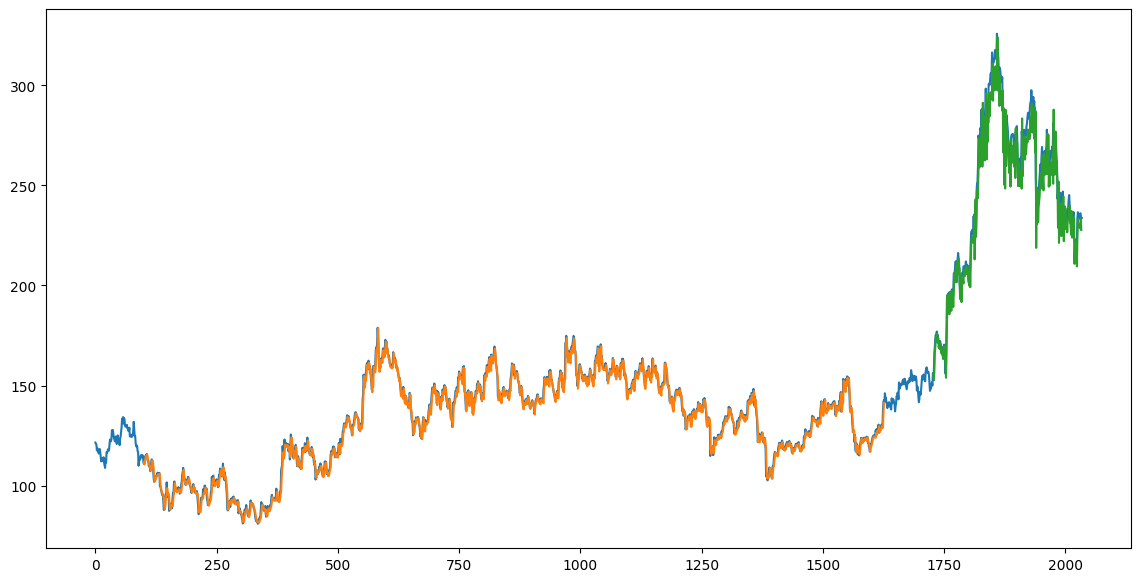

In [26]:
plt.figure(figsize=(14, 7))
plt.plot(sc.inverse_transform(df))
plt.plot(trainPredPlot)
plt.plot(testPredPlot)
plt.show()

In [27]:
len(test_data)

407

In [28]:
X_input = test_data[307:].reshape(1,-1)
X_input.shape
temp = list(X_input)
temp = temp[0].tolist()
temp

[0.8527369281045751,
 0.8621323529411764,
 0.8345588235294117,
 0.84375,
 0.7146650326797386,
 0.6605392156862745,
 0.6542075163398693,
 0.6803513071895424,
 0.6689133986928104,
 0.6642156862745099,
 0.678921568627451,
 0.6913807189542482,
 0.7089460784313726,
 0.7226307189542485,
 0.7340686274509802,
 0.7212009803921569,
 0.749795751633987,
 0.7689950980392157,
 0.7446895424836601,
 0.7120098039215685,
 0.7467320261437909,
 0.7549019607843137,
 0.7604166666666667,
 0.7598039215686274,
 0.7465277777777777,
 0.7624591503267975,
 0.7706290849673203,
 0.8041258169934642,
 0.7810457516339868,
 0.7941176470588236,
 0.7602124183006536,
 0.7348856209150327,
 0.7240604575163399,
 0.7399918300653596,
 0.749795751633987,
 0.7614379084967322,
 0.7542892156862746,
 0.7475490196078431,
 0.769607843137255,
 0.7495915032679739,
 0.8171977124183007,
 0.8020833333333335,
 0.7773692810457518,
 0.7571486928104576,
 0.7937091503267975,
 0.7916666666666667,
 0.7714460784313726,
 0.7526552287581698,
 0.7269

In [29]:

list_output = []
num_steps=100
i = 0
while (i < 30):
    if(len(temp) > 100):
        X_input = np.array(temp[1:])
        print("Day {} input {}".format(i, X_input))
        X_input = X_input.reshape(1,-1)
        X_input = X_input.reshape((1, num_steps, 1))
        yhat = model.predict(X_input, verbose = 0)
        print("Day {} output {}".format(i, yhat))
        temp.extend(yhat[0].tolist())
        temp = temp[1:]
        list_output.extend(yhat.tolist())
        i = i + 1
    else:
        X_input = X_input.reshape((1, num_steps, 1))
        yhat = model.predict(X_input, verbose = 0)
        print(yhat[0])
        temp.extend(yhat[0].tolist())
        print(len(temp))
        list_output.extend(yhat.tolist())
        i = i + 1

print(list_output)

[0.60687137]
101
Day 1 input [0.86213235 0.83455882 0.84375    0.71466503 0.66053922 0.65420752
 0.68035131 0.6689134  0.66421569 0.67892157 0.69138072 0.70894608
 0.72263072 0.73406863 0.72120098 0.74979575 0.7689951  0.74468954
 0.7120098  0.74673203 0.75490196 0.76041667 0.75980392 0.74652778
 0.76245915 0.77062908 0.80412582 0.78104575 0.79411765 0.76021242
 0.73488562 0.72406046 0.73999183 0.74979575 0.76143791 0.75428922
 0.74754902 0.76960784 0.7495915  0.81719771 0.80208333 0.77736928
 0.75714869 0.79370915 0.79166667 0.77144608 0.75265523 0.72691993
 0.6629902  0.68198529 0.64419935 0.62152778 0.6439951  0.66319444
 0.67544935 0.63705065 0.64603758 0.65890523 0.65870098 0.67790033
 0.63194444 0.63112745 0.62785948 0.64767157 0.63991013 0.63480392
 0.63868464 0.62336601 0.62745098 0.63970588 0.64705882 0.66196895
 0.67075163 0.65196078 0.63112745 0.61294935 0.6376634  0.62254902
 0.62745098 0.63337418 0.62642974 0.63623366 0.58312908 0.57781863
 0.57230392 0.58006536 0.57618464

In [30]:

new_day = np.arange(1, 101)
pred_day = np.arange(101, 131)
len(df)

2035

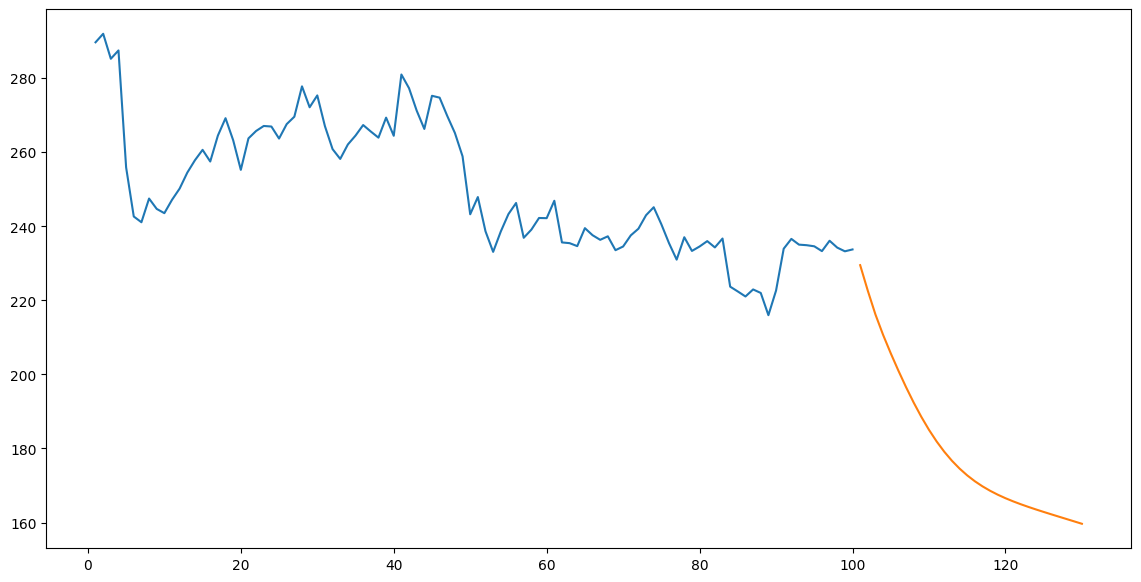

In [31]:

plt.figure(figsize=(14, 7))
plt.plot(new_day, sc.inverse_transform(df[1935:]))
plt.plot(pred_day, sc.inverse_transform(list_output))
plt.show()

In [32]:
df = df.tolist()
df.extend(list_output)

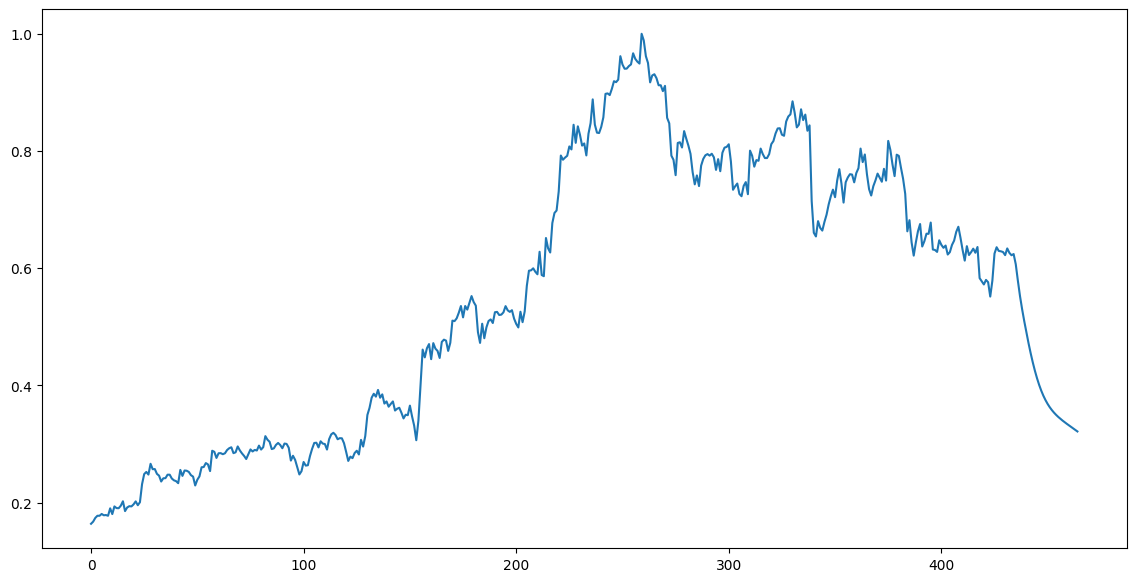

In [33]:
plt.figure(figsize=(14, 7))
plt.plot(df[1600:])
plt.show()